In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_data = pd.read_csv("train.csv")
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [2]:
top_crimes = train_data.Category.value_counts()[:10]
plt.figure(figsize=(12, 8))
pos = np.arange(len(top_crimes))
plt.barh(pos, top_crimes.values, color='purple');
plt.yticks(pos, top_crimes.index);

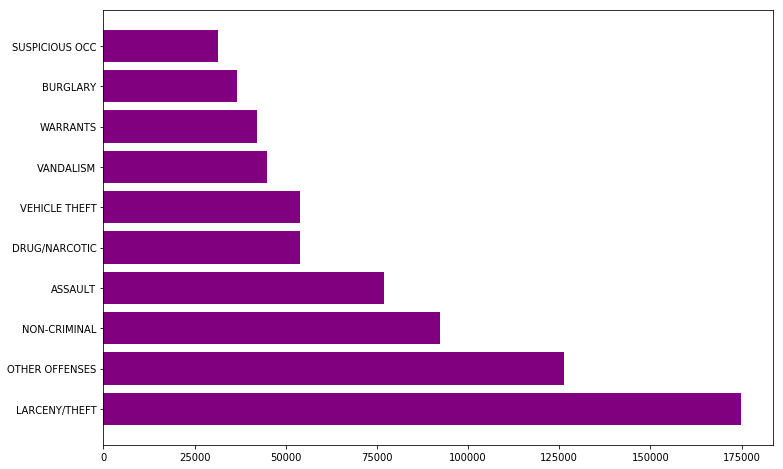

In [3]:
plt.show()

In [4]:
top_crimes

LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
VEHICLE THEFT      53781
VANDALISM          44725
WARRANTS           42214
BURGLARY           36755
SUSPICIOUS OCC     31414
Name: Category, dtype: int64

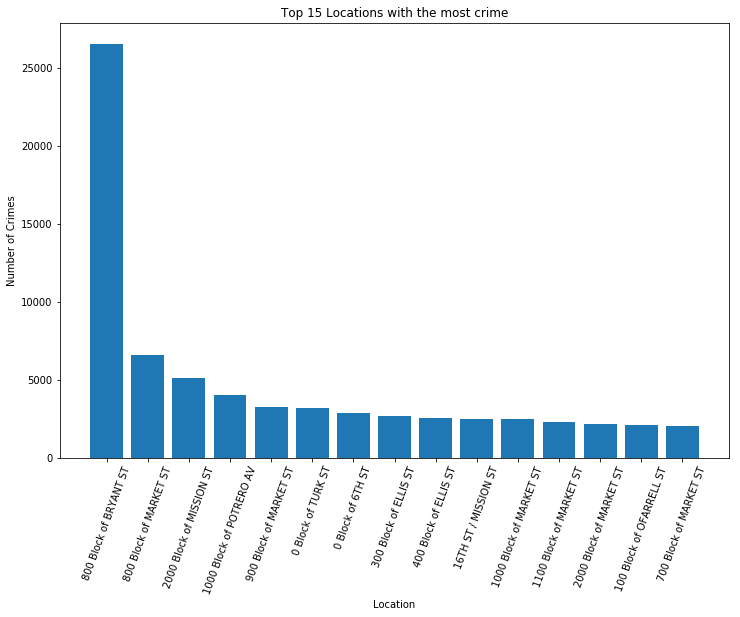

In [5]:
top_addresses = train_data.Address.value_counts()[:15]
plt.figure(figsize=(12, 8))

pos = np.arange(len(top_addresses))
plt.bar(pos, top_addresses.values)
plt.xticks(pos, top_addresses.index, rotation = 70)
plt.title('Top 15 Locations with the most crime')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.show()

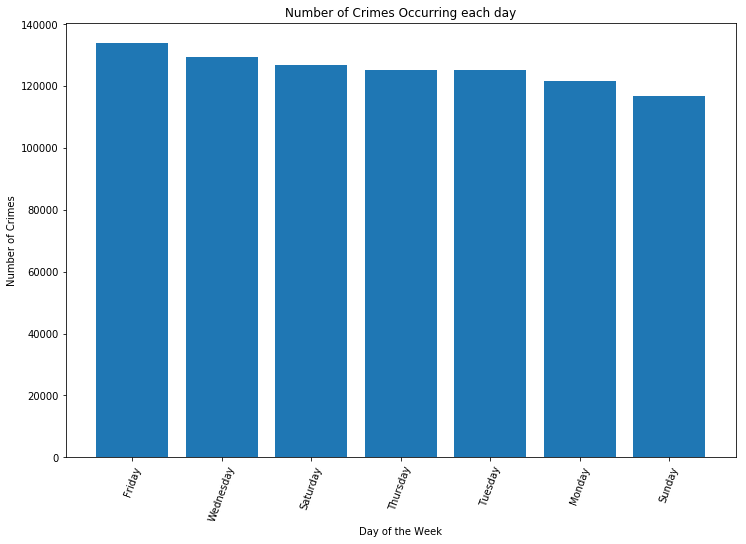

In [7]:
top_days = train_data.DayOfWeek.value_counts()
plt.figure(figsize=(12, 8))

pos = np.arange(len(top_days))
plt.bar(pos, top_days.values)
plt.xticks(pos, top_days.index, rotation = 70)
plt.title('Number of Crimes Occurring each day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

In [8]:
result = pd.read_csv("Results.csv")
result.head()

,Classifier,Accuracy Score
0,RandomForestClassifier,0.682951
1,GradientBoostingClassifier,0.681764
2,KNeighborsClassifier,0.665583
3,AdaBoostClassifier,0.657855
4,XGBoost,0.674187


In [10]:
train_data['Hour'] = train_data['Dates'].apply(lambda x:int(x.split(' ')[1].split(':')[0]))
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23


In [49]:
hours = train_data.groupby('Hour').size()
hours

Hour
0     44865
1     26173
2     22296
3     14014
4      9863
5      8637
6     13133
7     22048
8     32900
9     35555
10    37806
11    38373
12    51934
13    43145
14    44424
15    48058
16    50137
17    53553
18    55104
19    49475
20    44694
21    43661
22    45741
23    42460
dtype: int64

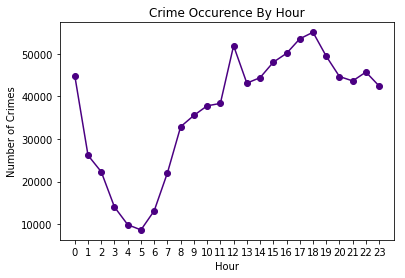

In [51]:
plt.plot(hours.values, 'ro-', color = 'indigo')

plt.xticks(hours.index)
plt.title('Crime Occurence By Hour')
plt.ylabel ('Number of Crimes')
plt.xlabel ('Hour')
plt.show()

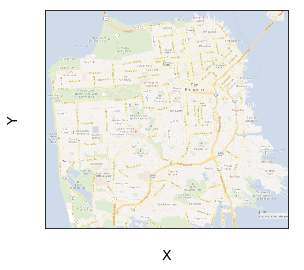

In [4]:
import matplotlib.image as mpimg
california_img=mpimg.imread('sanfrancisco.png')
train_data.plot(kind="scatter", x="Y", y="X", cmap=plt.get_cmap("jet"),colorbar=False, alpha=0.4)
                      
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05],alpha=0.5)
plt.ylabel("Y", fontsize=14)
plt.xlabel("X", fontsize=14)
plt.tick_params(colors='w')


plt.legend(fontsize=16)
plt.show()